# Measuring Software Testability Modulo Test Quality
## Correlation study

The following Python Jupyter Notebook can be used to interactively reproduce the study on the correlation we performed
in our paper with the title *Measuring Software Testability Modulo Test Quality*.

### Initialization

We import the needed Python modules.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

### Configuration

First, we configure the graphical environments to print the plots that show the correlation between the variables.

In [2]:
sns.set()
sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set(font_scale=1.6)

The, we configure some parameters for the script.
`DATA_CSV_FILE_PATH` specifies the path for the data `CSV` file analyzed by the script.
`SOFTWARE_METRICS` and `TEST_EFFORT_METRICS` are the lists of the software and test-effort metrics, respectively, to include in the analysis.
`QUALITY_METRICS` lists which varibles use to normalize the test-effort metrics.

In [3]:
DATA_CSV_FILE_PATH = 'resources/data.csv'

SOFTWARE_METRICS = [
    'LOC', 'NBI', 'LOCCOM', 'NPM', 'NSTAM', 'NOF', 'NSTAF', 'NMC', 'NMCI', 'NMCE', 'WMC', 'AMC',  'RFC', 'DIT', 'NOC',
    'MFA', 'CBO', 'IC', 'CBM', 'CA', 'CE', 'LCOM',  'LCOM3', 'CAM', 'DAM', 'NPRIF', 'NPRIM', 'NPROM'
]

TEST_EFFORT_METRICS = [
    'T-LOC', 'T-NOT', 'T-NOA', 'T-NMC', 'T-WMC', 'T-AMC',
]

QUALITY_METRICS = [
    'BRANCH_COVERAGE', 'LINE_COVERAGE', 'MUTATION_SCORE',
]

To ease the organization of the notebook, we define some utility functions.

The following function uses the `scipy` module to compute the *Spearman*'s correlation value between two variables.

In [4]:
def scipy_spearman(a, b):
    corr, pvalue = stats.spearmanr(a, b)
    return corr

The next function produces the correlation matrix between two sets of variables.
It also creates a heatmap plot to graphically show the correlation values.

In [5]:
def build_correlation_matrix_and_heatmap(software_metrics_df, test_effort_metrics_df, width=30, height=5):
    # Compute the correlation between metrics.
    concat_df = pd.concat(
        [software_metrics_df, test_effort_metrics_df], axis=1, keys=['software_metrics', 'test_effort_metrics'],
    )
    corr_df = concat_df.corr(method=scipy_spearman).loc['test_effort_metrics', 'software_metrics']
    
    # Normalize data between 0 and 1.
    corr_df = corr_df.apply(np.abs)

    # Build the heatmap.
    figure, (axes, cbar_ax) = plt.subplots(1, 2, figsize=(width, height), gridspec_kw={'width_ratios':[1, 0.02]})
    plt.tight_layout(pad=0, w_pad=0, h_pad=0)
    sns.heatmap(data=corr_df, annot=True, vmin=0, vmax=1, cmap='RdYlGn', ax=axes, cbar_ax=cbar_ax)
    
    # Return the correlation matrix.
    return corr_df, figure

def top_correlation_scores(corr_df, n=10):
    return corr_df.unstack().nlargest(n)


### Study

We first read the data from the `CSV` file, computing some basic descriptive statistics. 

In [6]:
df = pd.read_csv(DATA_CSV_FILE_PATH)

print(f"Number of pairs: {df.shape[0]}")
print(f"Number of projects: {df['PROJECT'].unique().shape[0]}")
print(f"Average number of pairs per project: {df.groupby('PROJECT').size().mean():.2f}")

Number of pairs: 9861
Number of projects: 1186
Average number of pairs per project: 8.31


In the following blocks, we compute the correlation matrices for each of the cases investigated in the study, showing the results as a heatmap and the ranking of top ten correlation scores.
We first compute the correlation scores between software and test variables without applying any normalization.
Then, we use the formula described in our paper to normalize the test-effort metrics with the test-quality values of *line coverage*, *branch coverage*, and *mutation score*.

#### Without normalization correlation

We prepare the data that will be useful also for the normalized cases of our analysis.
We split the data into two datasets, and then we compute the correlation matrix that we show in the form of a heatmap.
Finally, we print the top ten correlation scores we find.

Figure(2160x360)
LOC     T-LOC    0.525224
LOCCOM  T-LOC    0.487364
RFC     T-NMC    0.476725
LOC     T-NMC    0.473804
NBI     T-NMC    0.461378
NMC     T-NMC    0.456963
RFC     T-LOC    0.453639
NBI     T-LOC    0.451771
NMCI    T-NMC    0.441761
NMC     T-LOC    0.438071
dtype: float64


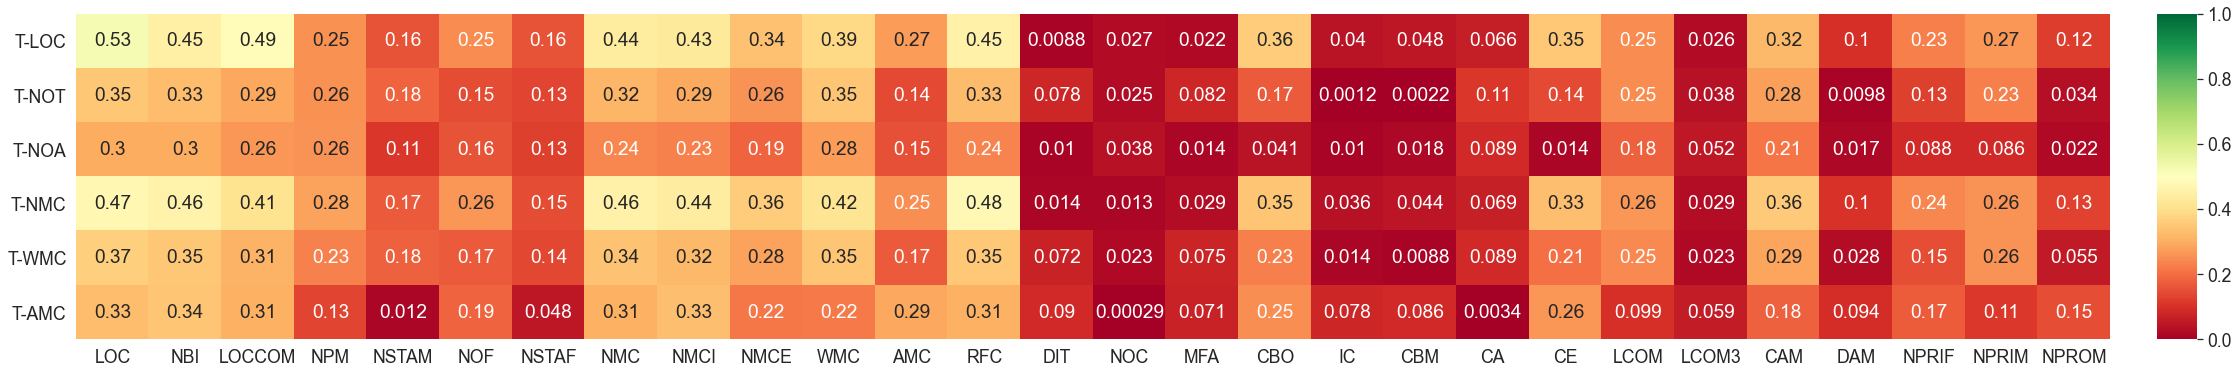

In [7]:
# Split the data.
software_metrics_df = df[SOFTWARE_METRICS]
test_effort_metrics_df = df[TEST_EFFORT_METRICS]

# Print the heatmap.
corr_df, corr_matrix_figure = build_correlation_matrix_and_heatmap(software_metrics_df, test_effort_metrics_df)
print(corr_matrix_figure)

# Print the top correlations.
print(top_correlation_scores(corr_df))

#### Normalized correlation: line coverage

Differently from the case without normalization, we first prepare our data by using the selected test-quality metric.
In this case, we selected the *line coverage* metric.
The following method applies similarly also for the other test-quality cases.

Figure(2160x360)
LOC     T-LOC    0.681547
RFC     T-LOC    0.626859
LOCCOM  T-LOC    0.621841
RFC     T-NMC    0.621629
NBI     T-LOC    0.610938
LOC     T-NMC    0.609076
NBI     T-NMC    0.596839
NMC     T-LOC    0.582734
        T-NMC    0.582508
WMC     T-LOC    0.568674
dtype: float64


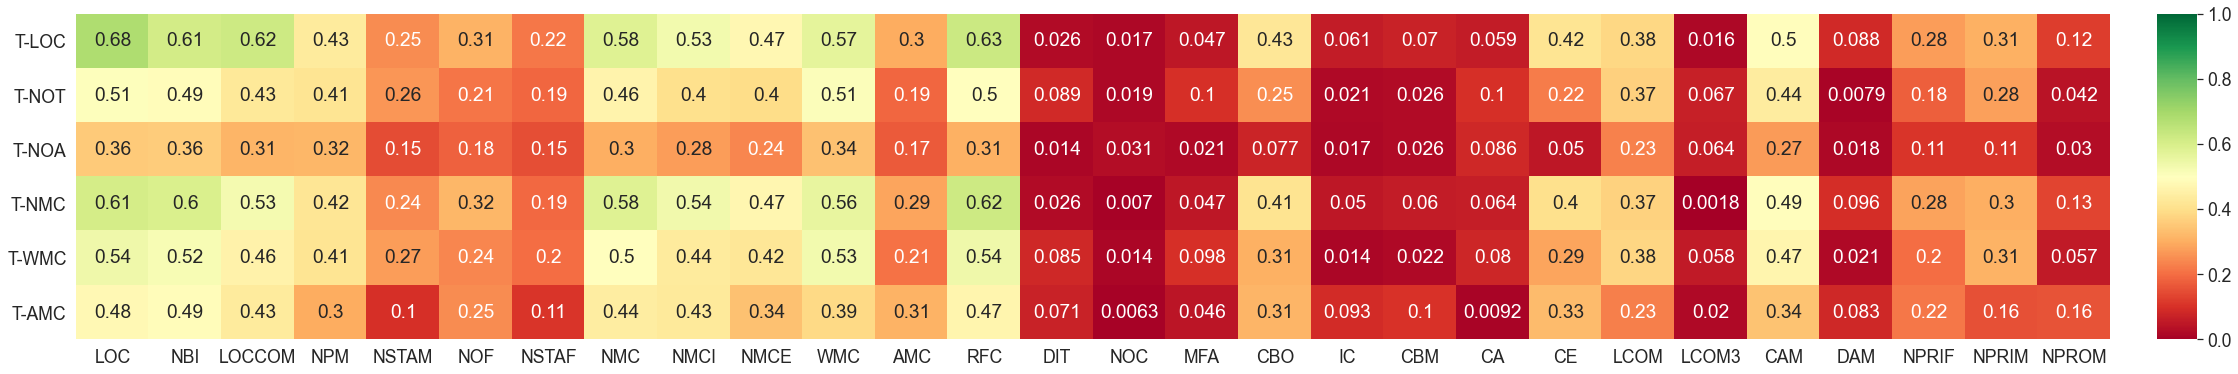

In [8]:
# Normalize data.
normalized_df = df.copy()
normalized_df[TEST_EFFORT_METRICS] = df[TEST_EFFORT_METRICS].divide(df['LINE_COVERAGE'], axis='index')

# Split the data.
software_metrics_df = normalized_df[SOFTWARE_METRICS]
test_effort_metrics_df = normalized_df[TEST_EFFORT_METRICS]

# Print the heatmap.
corr_df, corr_matrix_figure = build_correlation_matrix_and_heatmap(software_metrics_df, test_effort_metrics_df)
print(corr_matrix_figure)

# Print the top correlations.
print(top_correlation_scores(corr_df))

#### Normalized correlation: branch coverage

Figure(2160x360)
LOC     T-LOC    0.656349
RFC     T-LOC    0.617135
        T-NMC    0.611078
NBI     T-LOC    0.608484
LOCCOM  T-LOC    0.606585
LOC     T-NMC    0.593840
NBI     T-NMC    0.586243
NMC     T-LOC    0.585156
        T-NMC    0.579555
WMC     T-LOC    0.538329
dtype: float64


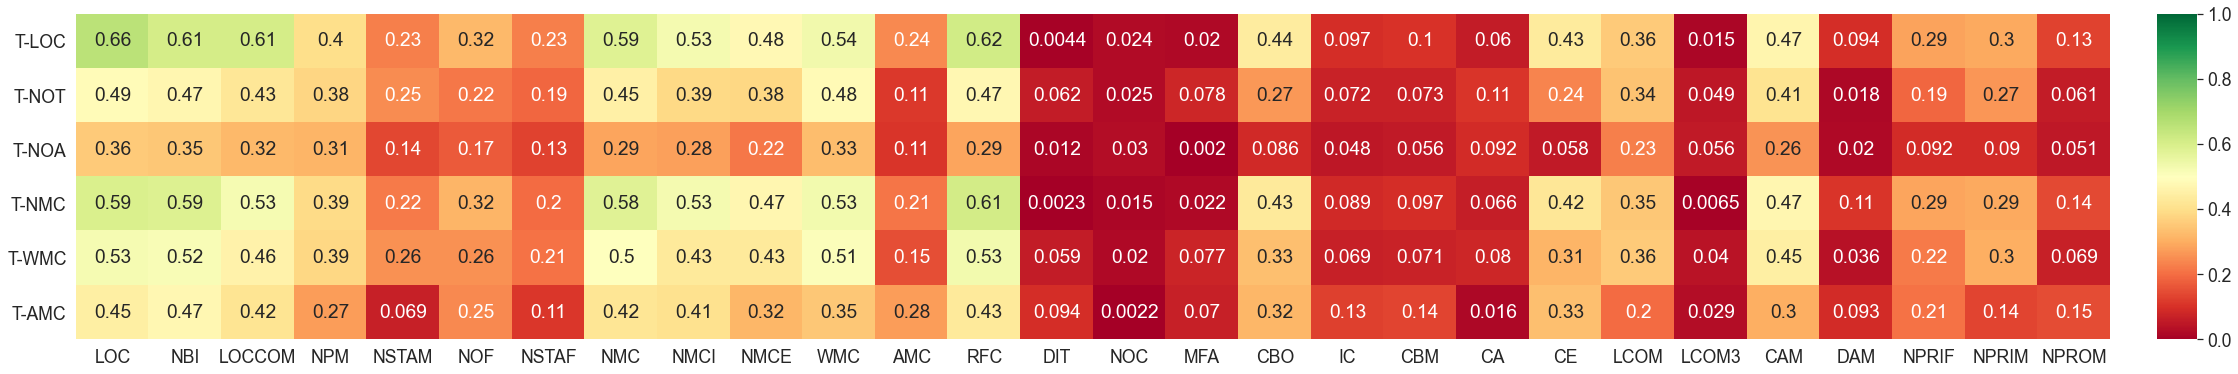

In [9]:
# Normalize data.
normalized_df = df.copy()
normalized_df[TEST_EFFORT_METRICS] = df[TEST_EFFORT_METRICS].divide(df['BRANCH_COVERAGE'], axis='index')

# Split the data.
software_metrics_df = normalized_df[SOFTWARE_METRICS]
test_effort_metrics_df = normalized_df[TEST_EFFORT_METRICS]

# Print the heatmap.
corr_df, corr_matrix_figure = build_correlation_matrix_and_heatmap(software_metrics_df, test_effort_metrics_df)
print(corr_matrix_figure)

# Print the top correlations.
print(top_correlation_scores(corr_df))

#### Normalized correlation: mutation score

Figure(2160x360)
LOC     T-LOC    0.715938
RFC     T-NMC    0.692927
        T-LOC    0.680958
NBI     T-LOC    0.673302
LOC     T-NMC    0.671676
NBI     T-NMC    0.671218
LOCCOM  T-LOC    0.649504
NMC     T-NMC    0.647277
        T-LOC    0.634297
RFC     T-WMC    0.616213
dtype: float64


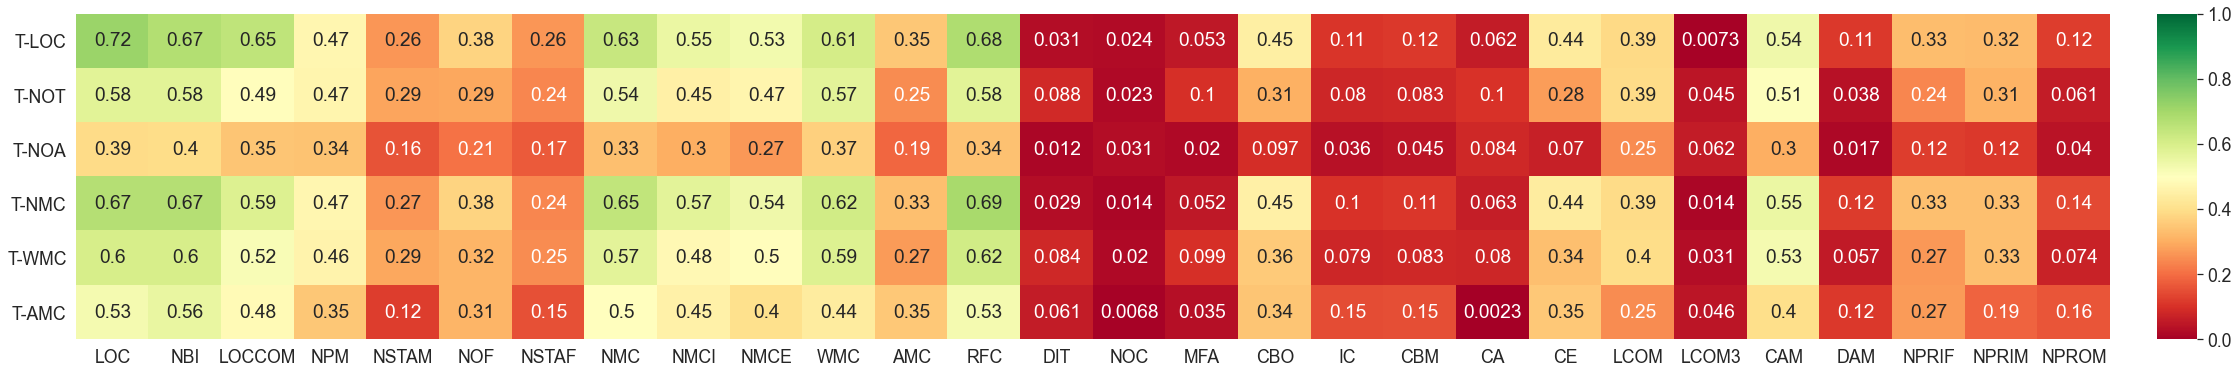

In [10]:
# Normalize data.
normalized_df = df.copy()
normalized_df[TEST_EFFORT_METRICS] = df[TEST_EFFORT_METRICS].divide(df['MUTATION_SCORE'], axis='index')

# Split the data.
software_metrics_df = normalized_df[SOFTWARE_METRICS]
test_effort_metrics_df = normalized_df[TEST_EFFORT_METRICS]

# Print the heatmap.
corr_df, corr_matrix_figure = build_correlation_matrix_and_heatmap(software_metrics_df, test_effort_metrics_df)
print(corr_matrix_figure)

# Print the top correlations.
print(top_correlation_scores(corr_df))